**description:-** 
In this competition, you must explore and cleanse a dataset consisting of over 111,000 loan records to determine 
the best way to predict whether a loan applicant will fully repay or default on a loan. You must then build a machine learning model 
which indicates whether the loan will be fully paid or charged off.

In [3]:
#!pip install --upgrade pip
#!pip install numpy --upgrade --user
#!pip install pandas --upgrade --user
#!pip install scikit-learn --upgrade --user

In [4]:
# Avoiding Warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [6]:
#!pip uninstall -y pandas

### loading the data

In [7]:
train = pd.read_csv("train.csv", low_memory=False)
test = pd.read_csv("test.csv", low_memory=False)

In [8]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,a3fdf1db-e991-4293-976c-7d35564c0aec,74561f96-304a-492d-bc19-a6107d2afee9,Charged Off,10120,Long Term,6920.0,10+ years,Rent,47564.0,Debt Consolidation,990.92,21.8,28.0,10,0,3840,7694,0.0,0.0
1,c3f8006d-d1ef-4a94-ba55-c48034974205,b8e70101-dd49-4a39-84a6-5f92b390684c,Fully Paid,7144,Short Term,721.0,2 years,Home Mortgage,40820.0,Debt Consolidation,574.88,10.7,NaN,6,0,13269,22565,0.0,0.0
2,076b722f-3658-47a8-a7f1-5179a9b45ade,0a28e046-9239-4ee0-8770-68a2f72bf2a0,Fully Paid,10100,Short Term,726.0,7 years,Own Home,54540.0,Debt Consolidation,577.22,37.3,NaN,6,0,5373,8667,0.0,0.0
3,c2d68e37-572b-4a3b-afaa-b55a679c7d67,dc755ef2-1773-4d3b-8b6b-668bbae290c5,Fully Paid,30362,Long Term,708.0,1 year,Home Mortgage,63450.0,Debt Consolidation,1110.37,12.5,52.0,14,0,38329,57207,0.0,0.0
4,c02558d1-58cb-4b36-9569-ae55baeb328a,f0804ea2-249b-4e6c-ab2a-1554a7ff6a5b,Fully Paid,3571,Short Term,700.0,5 years,Home Mortgage,41370.0,Debt Consolidation,875.67,13.1,6.0,4,0,384,985,0.0,0.0


In [9]:
# 1. column names are separated by spaces make it single column
train.columns = train.columns.str.replace(" ","_")

In [10]:
train.columns=train.columns.str.lower()

In [11]:
train.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,a3fdf1db-e991-4293-976c-7d35564c0aec,74561f96-304a-492d-bc19-a6107d2afee9,Charged Off,10120,Long Term,6920.0,10+ years,Rent,47564.0,Debt Consolidation,990.92,21.8,28.0,10,0,3840,7694,0.0,0.0
1,c3f8006d-d1ef-4a94-ba55-c48034974205,b8e70101-dd49-4a39-84a6-5f92b390684c,Fully Paid,7144,Short Term,721.0,2 years,Home Mortgage,40820.0,Debt Consolidation,574.88,10.7,NaN,6,0,13269,22565,0.0,0.0
2,076b722f-3658-47a8-a7f1-5179a9b45ade,0a28e046-9239-4ee0-8770-68a2f72bf2a0,Fully Paid,10100,Short Term,726.0,7 years,Own Home,54540.0,Debt Consolidation,577.22,37.3,NaN,6,0,5373,8667,0.0,0.0
3,c2d68e37-572b-4a3b-afaa-b55a679c7d67,dc755ef2-1773-4d3b-8b6b-668bbae290c5,Fully Paid,30362,Long Term,708.0,1 year,Home Mortgage,63450.0,Debt Consolidation,1110.37,12.5,52.0,14,0,38329,57207,0.0,0.0
4,c02558d1-58cb-4b36-9569-ae55baeb328a,f0804ea2-249b-4e6c-ab2a-1554a7ff6a5b,Fully Paid,3571,Short Term,700.0,5 years,Home Mortgage,41370.0,Debt Consolidation,875.67,13.1,6.0,4,0,384,985,0.0,0.0


In [12]:
print(train.shape)
train.describe()
#in current_loan_amount max value is just a placeholder- just a value to fill the column
#similarly in credit score max value, annual income etc

(77823, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,7.782300e+04,62908.000000,6.290800e+04,77823.000000,36414.000000,77823.000000,77823.000000,7.782300e+04,77675.000000,77818.000000
mean,1.153741e+07,1070.662412,7.247347e+04,18.201760,34.853820,11.117215,0.169076,1.552905e+04,0.118507,0.029363
std,3.192786e+07,1464.729646,5.841742e+04,7.030225,21.888976,5.013134,0.482684,2.032225e+04,0.352658,0.253986
min,8.850000e+02,585.000000,4.268000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.149500e+03,705.000000,4.467975e+04,13.500000,16.000000,8.000000,0.000000,5.879000e+03,0.000000,0.000000
50%,1.421300e+04,724.000000,6.177000e+04,16.900000,32.000000,10.000000,0.000000,1.100800e+04,0.000000,0.000000
75%,2.386150e+04,741.000000,8.695225e+04,21.700000,51.000000,14.000000,0.000000,1.942750e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,62.500000,176.000000,76.000000,12.000000,1.730472e+06,7.000000,11.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77823 entries, 0 to 77822
Data columns (total 19 columns):
loan_id                         77823 non-null object
customer_id                     77823 non-null object
loan_status                     77823 non-null object
current_loan_amount             77823 non-null int64
term                            77823 non-null object
credit_score                    62908 non-null float64
years_in_current_job            74500 non-null object
home_ownership                  77823 non-null object
annual_income                   62908 non-null float64
purpose                         77823 non-null object
monthly_debt                    77823 non-null object
years_of_credit_history         77823 non-null float64
months_since_last_delinquent    36414 non-null float64
number_of_open_accounts         77823 non-null int64
number_of_credit_problems       77823 non-null int64
current_credit_balance          77823 non-null int64
maximum_open_credit        

#### check whether there are duplicates if so remove it
loan_id is unique for every column so we use loan id to remove duplicates

In [14]:
print("total samples",len(train.loan_id))
unique_id = len(set(train.loan_id))
print("unique samples ",unique_id)
duplicate_id = len(train.loan_id) - unique_id
print("duplicate ids",duplicate_id)

total samples 77823
unique samples  62237
duplicate ids 15586


In [15]:
train = train.drop_duplicates() #it drops the entire similar rows only  [if for single column if there is  two values which are different
                                        # but the loan id is same it wont drop that]

In [16]:
train.shape

(69076, 19)

In [17]:
print("total  samples",train.shape[0])
print("total unique samples",len(set(train.loan_id)))
print("duplicate samples",str(train.shape[0]-len(set(train.loan_id)))) #after dropping duplicates there are still some duplicates

total  samples 69076
total unique samples 62237
duplicate samples 6839


In [18]:
#get those duplicates
dup_loanid=train[train.duplicated(['loan_id'],keep=False)]
print(dup_loanid.shape)
dup_loanid.describe()

(13678, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,1.367800e+04,10003.000000,10003.000000,13678.000000,7238.000000,13678.000000,13678.000000,13678.000000,13658.000000,13676.000000
mean,2.273433e+07,699.678396,72329.079976,17.805205,34.127383,11.253692,0.207340,15804.025735,0.139845,0.039485
std,4.189918e+07,24.988801,46577.155204,6.999957,21.766001,5.186481,0.533445,18911.802695,0.370914,0.299015
min,9.780000e+02,587.000000,9756.000000,3.700000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.793000e+03,690.000000,44928.000000,13.000000,15.000000,8.000000,0.000000,5755.250000,0.000000,0.000000
50%,1.779750e+04,708.000000,61362.000000,16.700000,31.000000,10.000000,0.000000,10962.000000,0.000000,0.000000
75%,3.504650e+04,718.000000,87014.500000,21.400000,50.000000,14.000000,0.000000,19879.750000,0.000000,0.000000
max,1.000000e+08,725.000000,934705.000000,59.500000,91.000000,47.000000,9.000000,291341.000000,4.000000,9.000000


In [19]:
#sort the duplicated values
sorted_df=dup_loanid.sort_values(["current_loan_amount","credit_score"],ascending=True,na_position="last")
sorted_df.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
58916,07f5fb21-82d8-4cd8-98eb-cef89b460348,90dcf223-324c-4579-9062-9e275d1a9ec0,Fully Paid,978,Short Term,718.0,NaN,Home Mortgage,74313.0,major_purchase,1226.16,34.8,10.0,10,0,16547,17603,0.0,0.0
5957,2bc65e92-50b3-453f-88f4-101aa3f7c631,85e53503-06fe-45f1-8c6e-48618b924167,Fully Paid,979,Short Term,711.0,10+ years,Rent,29367.0,Debt Consolidation,702.36,46.7,NaN,11,0,14133,15181,0.0,0.0
62240,2bc65e92-50b3-453f-88f4-101aa3f7c631,85e53503-06fe-45f1-8c6e-48618b924167,Fully Paid,979,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,702.36,46.7,NaN,11,0,14133,15181,0.0,0.0
33249,38af5e3a-9d54-456a-b335-21e172018517,5c92cda7-7386-47b4-b3d6-56c0e278e56f,Fully Paid,982,Short Term,697.0,5 years,Home Mortgage,29472.0,Debt Consolidation,44.21,11.5,NaN,3,0,2021,8456,0.0,0.0
56983,ae401455-a534-4d31-bafa-3b1e0474a35b,c8c64614-1c34-49d9-a608-64dc942cf447,Fully Paid,983,Short Term,698.0,< 1 year,Rent,37343.0,Debt Consolidation,886.89,13.0,NaN,11,0,17472,19074,0.0,0.0


In [20]:
#keep the first value of duplicate
correct_df = sorted_df.drop_duplicates(['loan_id'], keep='first')
print(correct_df.shape)
correct_df.head()

(6839, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
58916,07f5fb21-82d8-4cd8-98eb-cef89b460348,90dcf223-324c-4579-9062-9e275d1a9ec0,Fully Paid,978,Short Term,718.0,NaN,Home Mortgage,74313.0,major_purchase,1226.16,34.8,10.0,10,0,16547,17603,0.0,0.0
5957,2bc65e92-50b3-453f-88f4-101aa3f7c631,85e53503-06fe-45f1-8c6e-48618b924167,Fully Paid,979,Short Term,711.0,10+ years,Rent,29367.0,Debt Consolidation,702.36,46.7,NaN,11,0,14133,15181,0.0,0.0
33249,38af5e3a-9d54-456a-b335-21e172018517,5c92cda7-7386-47b4-b3d6-56c0e278e56f,Fully Paid,982,Short Term,697.0,5 years,Home Mortgage,29472.0,Debt Consolidation,44.21,11.5,NaN,3,0,2021,8456,0.0,0.0
56983,ae401455-a534-4d31-bafa-3b1e0474a35b,c8c64614-1c34-49d9-a608-64dc942cf447,Fully Paid,983,Short Term,698.0,< 1 year,Rent,37343.0,Debt Consolidation,886.89,13.0,NaN,11,0,17472,19074,0.0,0.0
47807,df1680ed-de74-4ec4-ab3c-cdacfd2a911e,b44395a3-4f94-41ff-ad65-8f1d8b06919d,Fully Paid,983,Short Term,714.0,5 years,Home Mortgage,44959.0,other,338.32,11.4,NaN,9,0,8182,9245,0.0,0.0


In [21]:
#checking whether it has any placeholder
correct_df[correct_df["current_loan_amount"] == 99999999]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [22]:
#checking for NAs in correct_df
correct_df[correct_df['credit_score'].isnull()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [23]:
train.drop_duplicates(["loan_id"],inplace=True,keep=False)

In [24]:
train.shape

(55398, 19)

In [25]:
#now append those correct_df to train
train=train.append(correct_df,ignore_index=True)
train.shape

(62237, 19)

In [26]:
train.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,a3fdf1db-e991-4293-976c-7d35564c0aec,74561f96-304a-492d-bc19-a6107d2afee9,Charged Off,10120,Long Term,6920.0,10+ years,Rent,47564.0,Debt Consolidation,990.92,21.8,28.0,10,0,3840,7694,0.0,0.0
1,c3f8006d-d1ef-4a94-ba55-c48034974205,b8e70101-dd49-4a39-84a6-5f92b390684c,Fully Paid,7144,Short Term,721.0,2 years,Home Mortgage,40820.0,Debt Consolidation,574.88,10.7,NaN,6,0,13269,22565,0.0,0.0
2,076b722f-3658-47a8-a7f1-5179a9b45ade,0a28e046-9239-4ee0-8770-68a2f72bf2a0,Fully Paid,10100,Short Term,726.0,7 years,Own Home,54540.0,Debt Consolidation,577.22,37.3,NaN,6,0,5373,8667,0.0,0.0
3,f1163150-313c-401c-b9d1-28c0c65de397,ebc6eebe-cb7a-4d73-b3bf-41a3d119a32c,Fully Paid,15350,Long Term,707.0,5 years,Home Mortgage,44514.0,Home Improvements,730.77,10.4,20.0,12,0,8485,20695,0.0,0.0
4,dd7e9bc9-a689-4982-b8c6-e8df59d884f9,8d2cc5a8-4ccc-4841-a678-65ac08bf790a,Fully Paid,12001,Short Term,700.0,10+ years,Home Mortgage,110211.0,Home Improvements,1212.32,29.1,6.0,17,1,8845,15795,1.0,0.0


### preprocessng /cleaning the data

#### 1. years in current job
it has both numeric and categorical data

In [27]:
train.years_in_current_job.unique()

array(['10+ years', '2 years', '7 years', '5 years', '< 1 year',
       '4 years', '8 years', '1 year', '3 years', nan, '6 years',
       '9 years'], dtype=object)

In [28]:
#remove years,+,NAN   ... /d is matching decimal digit
train["years_in_current_job"]=[0 if str(x) =="< 1 year" else x if str(x) == "nan" else int(re.findall(r'\d+',str(x))[0]) for x in (train['years_in_current_job'])]
train["years_in_current_job"].head()

0    10.0
1     2.0
2     7.0
3     5.0
4    10.0
Name: years_in_current_job, dtype: float64

#### 2. credit score

In [29]:
#we know that as per probelm statement credit score cannot be more than 800
train["credit_score"].head(10)

0    6920.0
1     721.0
2     726.0
3     707.0
4     700.0
5     733.0
6     694.0
7     724.0
8    6950.0
9       NaN
Name: credit_score, dtype: float64

In [30]:
#will write a function which brings credit score in range
def credit_score(x):
    if x > 800:
        return int(x/10)
    elif str(x) =="nan":
        return x
    else:
        return int(x)

In [31]:
train["credit_score"]=train["credit_score"].map(credit_score)
train["credit_score"].head(10)

0    692.0
1    721.0
2    726.0
3    707.0
4    700.0
5    733.0
6    694.0
7    724.0
8    695.0
9      NaN
Name: credit_score, dtype: float64

#### 3. max open credit

In [32]:
print(train.shape)
train[train['maximum_open_credit']=='#VALUE!']

(62237, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
35792,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0


In [33]:
train = train[train['maximum_open_credit'] != '#VALUE!']
train['maximum_open_credit']= pd.to_numeric(train['maximum_open_credit'])
train.shape

(62236, 19)

#### 4. monthly debt

In [34]:
#Monthly debt has Currency symbol due to which its datatype is string, remove it and convert it to numeric.
train['monthly_debt']=train['monthly_debt'].str.strip('$')
train['monthly_debt']=pd.to_numeric(train['monthly_debt'])
train['monthly_debt'].describe()

count    62236.000000
mean       963.652898
std        642.179962
min          0.000000
25%        532.187500
50%        842.560000
75%       1250.362500
max      22939.120000
Name: monthly_debt, dtype: float64

### handling missing values and outliers

Describe the data and check which feature has Missing Values and if there is any Outlier

In [35]:
train.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,6.223600e+04,50997.000000,59559.00000,5.099700e+04,62236.000000,62236.000000,28202.000000,62236.000000,62236.000000,6.223600e+04,6.223600e+04,62111.000000,62232.000000
mean,9.430040e+06,720.099947,5.87980,7.247030e+04,963.652898,18.316124,35.065917,11.105341,0.161595,1.548047e+04,3.578511e+04,0.113603,0.028121
std,2.920319e+07,27.890502,3.62742,6.093935e+04,642.179962,7.063472,21.933629,4.986069,0.472253,2.027638e+04,3.726335e+05,0.345461,0.248755
min,8.850000e+02,585.000000,0.00000,4.268000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.060000e+03,708.000000,3.00000,4.468100e+04,532.187500,13.500000,16.000000,8.000000,0.000000,5.925750e+03,1.279600e+04,0.000000,0.000000
50%,1.342550e+04,728.000000,6.00000,6.170800e+04,842.560000,17.000000,32.000000,10.000000,0.000000,1.101400e+04,2.181350e+04,0.000000,0.000000
75%,2.162800e+04,741.000000,10.00000,8.691200e+04,1250.362500,21.800000,51.000000,14.000000,0.000000,1.936525e+04,3.647600e+04,0.000000,0.000000
max,1.000000e+08,751.000000,10.00000,8.713547e+06,22939.120000,62.500000,176.000000,76.000000,12.000000,1.730472e+06,6.998809e+07,7.000000,11.000000


#### Outlier treatment: Current Loan Amount

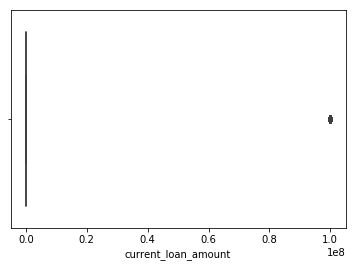

In [36]:
ax=sns.boxplot(train["current_loan_amount"],orient='h')

In [37]:
# check the description their is a placeholder in max value
train[train["current_loan_amount"] == 99999999]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
21,b4130876-c81b-423d-a69b-a7ab6aa76c68,6255b3d6-d167-48eb-8656-78747b31ae1e,Fully Paid,99999999,Short Term,746.0,10.0,Home Mortgage,178293.0,Debt Consolidation,1142.56,19.4,23.0,13,0,38966,347907,0.0,0.0
34,d140c39f-2a26-429e-a68e-874a58df778a,2868249d-856e-4206-a8f7-8adb2dae4db4,Fully Paid,99999999,Short Term,743.0,6.0,Rent,109175.0,Debt Consolidation,1401.08,21.5,NaN,12,0,17466,37321,0.0,0.0
37,9b235251-b029-4fb8-b87e-75255f8660d7,81d48734-77cb-4379-9802-fcf77ad82088,Fully Paid,99999999,Short Term,735.0,10.0,Home Mortgage,84456.0,Debt Consolidation,1703.20,24.5,NaN,18,0,21182,89373,0.0,0.0
44,45a1ec5e-20cc-40ed-aaf1-a5de6fbd19b1,6d4ad284-7311-4e34-86bb-cfa2a20de736,Fully Paid,99999999,Short Term,735.0,10.0,Home Mortgage,55363.0,Debt Consolidation,516.72,33.4,12.0,19,0,5827,41328,0.0,0.0
50,d1d847ee-43fc-49ac-b9a4-48ab3cc23f9a,97d23b9d-ddbe-4505-adfe-5898ecf1ba88,Fully Paid,99999999,Short Term,746.0,2.0,Home Mortgage,132626.0,Debt Consolidation,1801.50,14.0,NaN,14,0,15754,21941,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,9c28c63d-75b0-42df-8416-e88cc93ae0a7,3c273143-63ba-400d-810a-c4b80668db72,Fully Paid,99999999,Short Term,737.0,5.0,Home Mortgage,32210.0,Debt Consolidation,456.30,11.1,NaN,5,0,4208,4530,0.0,0.0
55374,44bc349f-f21e-46c7-a6c3-1e20bd249e0c,c513cd75-e007-4cf2-b929-07df95b3f825,Fully Paid,99999999,Short Term,734.0,4.0,Home Mortgage,85803.0,Debt Consolidation,986.73,21.9,1.0,6,2,6426,10985,0.0,2.0
55381,13be0ed7-b712-4fb2-9d71-d50e77f3c44f,a88250e8-59b8-47ce-8e6b-e21446d31f5d,Fully Paid,99999999,Short Term,746.0,4.0,Rent,73185.0,Debt Consolidation,806.25,28.7,NaN,10,0,18104,36796,0.0,0.0
55384,9821d891-5d7a-4141-95c5-65bc09d67f79,b1f6e895-158b-4e26-a35a-875ac7095c3d,Fully Paid,99999999,Short Term,746.0,2.0,Rent,58218.0,other,1135.25,16.4,19.0,17,0,53919,110489,0.0,0.0


In [38]:
#since it is a placeholder which can be replaced by nans
train["current_loan_amount"]=[np.nan if int(x)==99999999 else x for x in train["current_loan_amount"]]

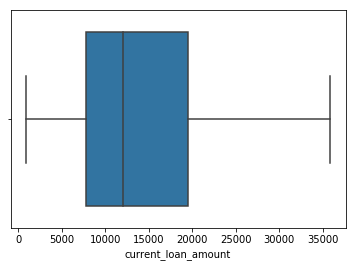

In [39]:
ax = sns.boxplot(train["current_loan_amount"])

### annual income

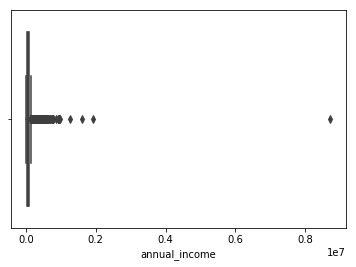

In [40]:
sns.boxplot(train["annual_income"])

In [41]:
train[train['annual_income']==8713547.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
1574,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.0,Short Term,725.0,10.0,Home Mortgage,8713547.0,Debt Consolidation,798.74,16.0,NaN,11,0,16462,30429,0.0,0.0


In [42]:
train = train[train['annual_income']!=8713547.000]
train.shape

(62235, 19)

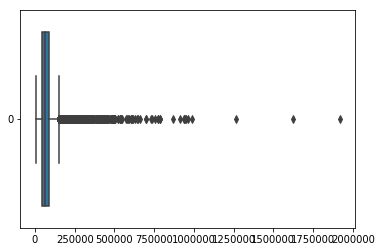

In [43]:
ax = sns.boxplot(data=train['annual_income'], orient="h")

In [44]:
train[train['annual_income']>1200000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
3686,d728b670-7248-4c64-b99e-251d9e7b88a2,a0222c05-0157-4791-b2b9-c74d51774d16,Charged Off,34430.0,Long Term,739.0,0.0,Home Mortgage,1623105.0,Debt Consolidation,2637.55,14.7,17.0,15,0,26265,69668,0.0,0.0
11660,cbd2df62-ea45-4ae0-bbeb-1681d5655221,97b34fe1-09e4-4c27-b8cc-ec335ec29891,Charged Off,15928.0,Long Term,733.0,2.0,Home Mortgage,1262125.0,Debt Consolidation,22939.12,19.2,NaN,10,0,48726,58565,0.0,0.0
46615,076e5ce5-cc5a-4c3e-8e11-91c31a4fa00e,ecc52a5d-a428-455c-9ae6-332cafac55b2,Fully Paid,28291.0,Short Term,747.0,6.0,Own Home,1919760.0,Debt Consolidation,335.96,11.2,NaN,7,0,13889,25768,0.0,0.0


In [45]:
train = train.drop([3686, 11660, 46615])

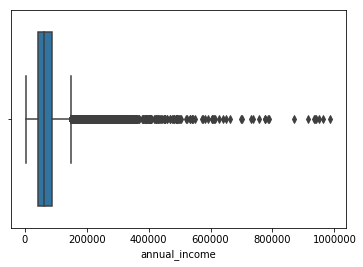

In [46]:
#still there are lot of outliers 
sns.boxplot(train["annual_income"],orient='h')

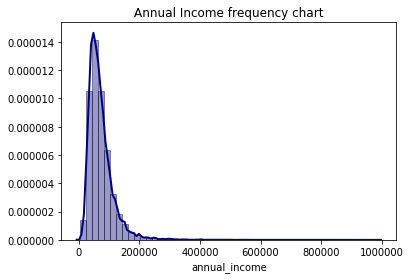

In [47]:
#we will try to understand ab that plot using frequency distribution
#it is normally distributed with right tail.. we can say that there can be some people with greater income per annum
sns.distplot(train['annual_income'].dropna(), hist=True,color="darkblue",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income frequency chart'); 
plt.show()

#### years of credit history

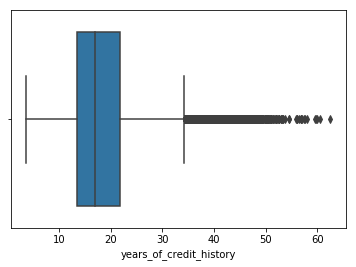

In [48]:
sns.boxplot(train["years_of_credit_history"],orient='h')

In [49]:
train[train["years_of_credit_history"]> 58]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
1908,cd5ca817-ff39-41e1-8dcd-3a86346c4631,33dd7f5c-92fa-4dcf-b798-6565b8281f0d,Fully Paid,14829.0,Short Term,741.0,7.0,Home Mortgage,86008.0,Business Loan,860.80,59.9,NaN,9,1,4558,9596,1.0,0.0
32096,433a4adf-886b-4df7-998a-a0e171fb98bc,7e068df8-61ed-4418-9e6f-9d7610f3238f,Fully Paid,14802.0,Short Term,NaN,NaN,Home Mortgage,NaN,Debt Consolidation,821.02,62.5,24.0,8,0,7007,23593,0.0,0.0
45779,0ca8800a-36f0-48b3-9564-2cce86190862,b6d390e3-8cb6-44b7-981a-ce00be0ca85f,Charged Off,21197.0,Short Term,NaN,10.0,Home Mortgage,NaN,Debt Consolidation,1574.66,60.5,48.0,11,1,7928,19575,1.0,0.0
49017,133375dc-a8ef-481a-854e-2958fc7ca9f6,a23f7854-accc-48c6-8634-d9277f92c10b,Charged Off,20190.0,Short Term,710.0,10.0,Home Mortgage,46290.0,Home Improvements,690.49,59.7,NaN,7,0,2865,7091,0.0,0.0
61832,7e687480-14cb-416e-bc82-faea0ccf2a71,0c401d4d-523a-4eb5-97b0-f5677fd34ade,Fully Paid,34192.0,Long Term,676.0,10.0,Home Mortgage,126509.0,Debt Consolidation,3478.99,59.5,NaN,15,0,59003,71259,0.0,0.0


In [50]:
train = train.drop([1908, 32096, 45779, 49017, 61832])

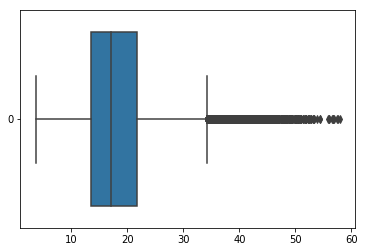

In [51]:
#only few are extream rest all continuous in nature like in annual income..means population is less in that region
ax = sns.boxplot(data=train['years_of_credit_history'], orient="h")

In [52]:
train.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,56366.000000,50990.000000,59551.000000,50990.000000,62227.000000,62227.000000,28199.000000,62227.000000,62227.000000,6.222700e+04,6.222700e+04,62102.000000,62223.000000
mean,13975.691055,720.099353,5.879666,72210.054462,963.243679,18.312937,35.066492,11.105453,0.161586,1.547971e+04,3.578521e+04,0.113587,0.028125
std,8296.036253,27.891096,3.627388,45910.078804,636.028813,7.053806,21.934298,4.986302,0.472260,2.027645e+04,3.726604e+05,0.345447,0.248773
min,885.000000,585.000000,0.000000,4268.000000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7800.000000,708.000000,3.000000,44681.000000,532.175000,13.500000,16.000000,8.000000,0.000000,5.925500e+03,1.279600e+04,0.000000,0.000000
50%,12059.000000,728.000000,6.000000,61696.000000,842.550000,17.000000,32.000000,10.000000,0.000000,1.101400e+04,2.181200e+04,0.000000,0.000000
75%,19477.000000,741.000000,10.000000,86887.000000,1250.280000,21.800000,51.000000,14.000000,0.000000,1.936450e+04,3.647550e+04,0.000000,0.000000
max,35875.000000,751.000000,10.000000,986523.000000,12055.680000,58.000000,176.000000,76.000000,12.000000,1.730472e+06,6.998809e+07,7.000000,11.000000


#### number of open accounts

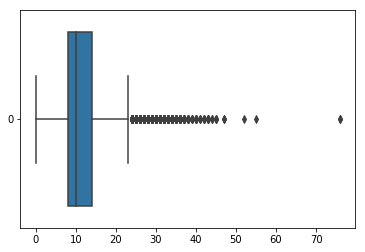

In [53]:
ax = sns.boxplot(data=train['number_of_open_accounts'], orient="h")

In [54]:
train[train['number_of_open_accounts']>50]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
26502,7d000d90-1538-4d4d-b7c2-15724be2025e,080f449b-c0b7-4226-8a51-cdcc7e68954f,Fully Paid,6082.0,Short Term,742.0,10.0,Home Mortgage,71973.0,Debt Consolidation,422.84,18.7,NaN,52,0,7234,164404,0.0,0.0
26637,4f8a7824-b9bd-4b8c-b2a1-6b7b196d2c0f,67a534d6-7038-4e0b-8d42-8aab6d220701,Fully Paid,28185.0,Long Term,744.0,2.0,Home Mortgage,201320.0,Debt Consolidation,4429.04,15.6,NaN,55,0,34159,185646,0.0,0.0
27936,08dab131-9db3-4184-a32a-e12e48fd5d6c,907c2a89-76f8-4089-9a47-d410bb885339,Charged Off,18755.0,Long Term,670.0,7.0,Rent,46912.0,Debt Consolidation,1032.06,27.4,NaN,76,0,22111,28131,0.0,0.0
39254,f4e0a453-a5ec-4011-9513-9d203ffe8e3c,3e62a9e2-a61b-472d-8e56-234e30061580,Charged Off,20426.0,Short Term,708.0,5.0,Home Mortgage,122556.0,Debt Consolidation,2195.80,15.7,NaN,76,0,40606,121575,0.0,0.0


In [55]:
train = train.drop([26502, 26637, 27936, 39254])

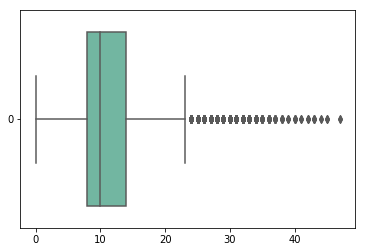

In [56]:
#values are not in continuous
ax = sns.boxplot(data=train['number_of_open_accounts'], orient="h", palette="Set2")

In [57]:
#we will perform capping it means replacing outliers with max value
IQR = train['number_of_open_accounts'].quantile(0.75) - train['number_of_open_accounts'].quantile(0.25)
upper_limit = train['number_of_open_accounts'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 23.0


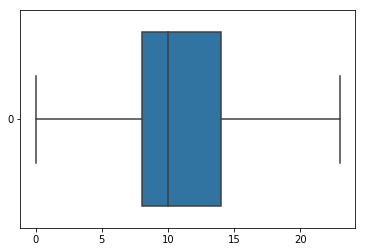

In [58]:
train['number_of_open_accounts'] = [23.0 if ( x>23.0 and x!=np.nan) else x for x in train['number_of_open_accounts']]
ax = sns.boxplot(data=train['number_of_open_accounts'], orient="h")

In [59]:
print(train.shape)
train.describe()

(62223, 19)


,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,56362.000000,50986.000000,59547.000000,50986.000000,62223.000000,62223.000000,28199.000000,62223.000000,62223.000000,6.222300e+04,6.222300e+04,62098.000000,62219.000000
mean,13975.379759,720.099674,5.879658,72207.035578,963.175749,18.312870,35.066492,11.005770,0.161596,1.547903e+04,3.577948e+04,0.113595,0.028126
std,8295.979180,27.890887,3.627431,45907.640679,635.874532,7.053922,21.934298,4.648976,0.472274,2.027667e+04,3.726714e+05,0.345457,0.248780
min,885.000000,585.000000,0.000000,4268.000000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7800.000000,708.000000,3.000000,44681.000000,532.175000,13.500000,16.000000,8.000000,0.000000,5.925000e+03,1.279550e+04,0.000000,0.000000
50%,12059.000000,728.000000,6.000000,61696.000000,842.520000,17.000000,32.000000,10.000000,0.000000,1.101400e+04,2.181200e+04,0.000000,0.000000
75%,19476.750000,741.000000,10.000000,86887.000000,1250.250000,21.800000,51.000000,14.000000,0.000000,1.936350e+04,3.647200e+04,0.000000,0.000000
max,35875.000000,751.000000,10.000000,986523.000000,12055.680000,58.000000,176.000000,23.000000,12.000000,1.730472e+06,6.998809e+07,7.000000,11.000000


In [60]:
#looks like all outliers are removed
#will check for Nan values
train.isnull().sum().sort_values(ascending=False)

months_since_last_delinquent    34024
credit_score                    11237
annual_income                   11237
current_loan_amount              5861
years_in_current_job             2676
bankruptcies                      125
tax_liens                           4
home_ownership                      0
customer_id                         0
loan_status                         0
term                                0
purpose                             0
monthly_debt                        0
years_of_credit_history             0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
loan_id                             0
dtype: int64

In [61]:
# Since percentage value of Missing values in Bankruptcies and Tax Liens are very low we can delete the rows
train = train.dropna(subset=['bankruptcies', 'tax_liens'])
print(train.shape)
train.isnull().sum().sort_values(ascending=False)

(62098, 19)


months_since_last_delinquent    34024
annual_income                   11216
credit_score                    11216
current_loan_amount              5847
years_in_current_job             2676
tax_liens                           0
customer_id                         0
loan_status                         0
term                                0
home_ownership                      0
purpose                             0
bankruptcies                        0
monthly_debt                        0
years_of_credit_history             0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
loan_id                             0
dtype: int64

### months since last delinquent
it describes the number of months since the credit is not paid, so NA's actually are the genuine customers so replacing it with 0

In [62]:
train["months_since_last_delinquent"].fillna(0, inplace = True)
print(train.shape)
train.isnull().sum().sort_values(ascending=False)

(62098, 19)


annual_income                   11216
credit_score                    11216
current_loan_amount              5847
years_in_current_job             2676
tax_liens                           0
customer_id                         0
loan_status                         0
term                                0
home_ownership                      0
purpose                             0
bankruptcies                        0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent        0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
loan_id                             0
dtype: int64

In [62]:
train.reset_index()

,index,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,0,a3fdf1db-e991-4293-976c-7d35564c0aec,74561f96-304a-492d-bc19-a6107d2afee9,Charged Off,10120.0,Long Term,692.0,10.0,Rent,47564.0,Debt Consolidation,990.92,21.8,28.0,10.0,0,3840,7694,0.0,0.0
1,1,c3f8006d-d1ef-4a94-ba55-c48034974205,b8e70101-dd49-4a39-84a6-5f92b390684c,Fully Paid,7144.0,Short Term,721.0,2.0,Home Mortgage,40820.0,Debt Consolidation,574.88,10.7,0.0,6.0,0,13269,22565,0.0,0.0
2,2,076b722f-3658-47a8-a7f1-5179a9b45ade,0a28e046-9239-4ee0-8770-68a2f72bf2a0,Fully Paid,10100.0,Short Term,726.0,7.0,Own Home,54540.0,Debt Consolidation,577.22,37.3,0.0,6.0,0,5373,8667,0.0,0.0
3,3,f1163150-313c-401c-b9d1-28c0c65de397,ebc6eebe-cb7a-4d73-b3bf-41a3d119a32c,Fully Paid,15350.0,Long Term,707.0,5.0,Home Mortgage,44514.0,Home Improvements,730.77,10.4,20.0,12.0,0,8485,20695,0.0,0.0
4,4,dd7e9bc9-a689-4982-b8c6-e8df59d884f9,8d2cc5a8-4ccc-4841-a678-65ac08bf790a,Fully Paid,12001.0,Short Term,700.0,10.0,Home Mortgage,110211.0,Home Improvements,1212.32,29.1,6.0,17.0,1,8845,15795,1.0,0.0
5,5,43ac3753-cf9a-41b3-be3e-57317d8bd7c3,bbe8523b-acd2-4094-b8b7-6392bdb305de,Fully Paid,30015.0,Short Term,733.0,0.0,Home Mortgage,87074.0,Debt Consolidation,1356.90,14.0,0.0,10.0,1,19009,30708,1.0,0.0
6,6,46b856df-abfb-4d96-9c12-a086b81a29cf,66950216-df0f-425d-ab74-857cb17f3d65,Charged Off,5116.0,Short Term,694.0,4.0,Rent,46040.0,other,402.85,11.8,0.0,9.0,0,8952,13503,0.0,0.0
7,7,ca6754d4-1f5d-471d-87bd-c6b5b6944289,ec81692f-7266-47f9-8556-f75a15245bd0,Fully Paid,6101.0,Short Term,724.0,2.0,Rent,48811.0,other,532.86,8.4,0.0,6.0,0,6399,11188,0.0,0.0
8,8,e095ddde-ea05-42ca-8c1e-cdc6b42c8082,39ee9995-7772-4c89-a321-36a784536c6a,Charged Off,28294.0,Long Term,695.0,10.0,Rent,80840.0,Debt Consolidation,644.02,12.5,0.0,5.0,0,13411,20825,0.0,0.0
9,9,706696ba-96a2-44eb-b170-feb0b88025e7,1b5dda11-9af6-4491-a6f4-43a6351f5348,Fully Paid,12014.0,Short Term,NaN,5.0,Home Mortgage,NaN,Debt Consolidation,273.66,17.4,0.0,5.0,1,5171,20043,0.0,1.0


In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Missing Value Treatment: Current Loan Amount, Credit Score, Years In Current Job, Annual Income..
Applying **'Iterative Imputer'** using default estimator **'Bayesian Ridge'** which is **Regularized Linear Regression**.
and it makes all value self centered

In [63]:
train.reset_index(drop=True, inplace=True)
my_imputer = IterativeImputer()
#For this we need only numerical variables so filtering this
train_numerical = train._get_numeric_data()
train_numerical_columns = train_numerical.columns 
print(train_numerical.shape)
train_numerical.isnull().sum()

(62098, 13)


current_loan_amount              5847
credit_score                    11216
years_in_current_job             2676
annual_income                   11216
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent        0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

In [64]:
train_imputed = my_imputer.fit_transform(train_numerical)
#Imputer will give the array as an object so need to convert it to Dataframe with columns
train_imputed = pd.DataFrame(train_imputed, columns=train_numerical_columns)
train_imputed.isnull().sum()

current_loan_amount             0
credit_score                    0
years_in_current_job            0
annual_income                   0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

In [66]:
train_imputed.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,62098.000000,62098.000000,62098.000000,62098.000000,62098.000000,62098.000000,62098.000000,62098.000000,62098.000000,6.209800e+04,6.209800e+04,62098.000000,62098.000000
mean,13853.614843,720.192911,5.901964,72027.929899,963.897555,18.308263,15.896325,11.008052,0.161857,1.548316e+04,3.574737e+04,0.113595,0.028181
std,8029.726370,25.479732,3.556376,43191.561445,635.784537,7.055232,22.866127,4.647394,0.472647,2.027347e+04,3.729890e+05,0.345457,0.249020
min,975.000000,585.000000,0.000000,4268.000000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7973.000000,711.000000,3.000000,45860.500000,532.757500,13.500000,0.000000,8.000000,0.000000,5.935250e+03,1.279825e+04,0.000000,0.000000
50%,12035.000000,725.000000,6.000000,63001.009885,843.110000,17.000000,0.000000,10.000000,0.000000,1.102100e+04,2.181200e+04,0.000000,0.000000
75%,18412.620578,739.000000,10.000000,86422.000000,1251.042500,21.800000,28.000000,14.000000,0.000000,1.937375e+04,3.646600e+04,0.000000,0.000000
max,91145.500809,764.656089,10.375107,986523.000000,12055.680000,58.000000,176.000000,23.000000,12.000000,1.730472e+06,6.998809e+07,7.000000,11.000000


Plotting histogram to see the difference between without na values and after replacing na values with Iterative Imputer.
train_numerical is our Dataframe with NA's, while, train_imputed is our Dataframe without NA's.

#### current loan amount
just to check how distribution looks like after imputation and before imputation

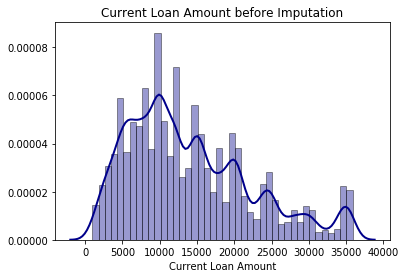

In [67]:
#before
ax = sns.distplot(train_numerical['current_loan_amount'].dropna(), hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount before Imputation'); 
plt.show()

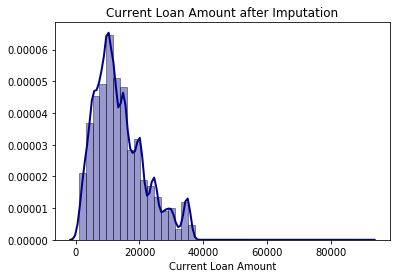

In [68]:
#after
ax = sns.distplot(train_imputed['current_loan_amount'], hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount after Imputation'); 
plt.show()

In [69]:
temp = train_imputed[train_imputed['current_loan_amount']<40000]

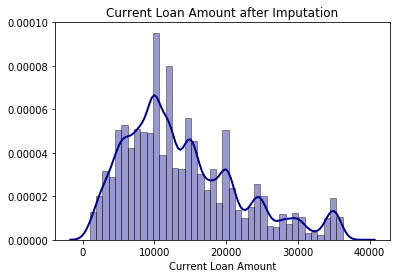

In [70]:
#after when current loan amount is less than 40000
ax = sns.distplot(temp['current_loan_amount'], hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount after Imputation'); 
plt.show()

### credit score

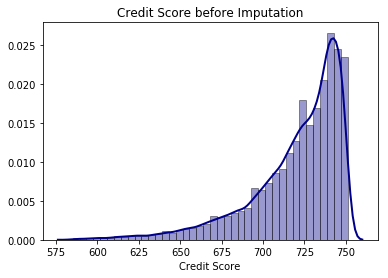

In [71]:
#before
ax = sns.distplot(train_numerical['credit_score'].dropna(), hist=True, kde=True, 
             bins=int(800/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Credit Score') 
plt.title('Credit Score before Imputation'); 
plt.show()

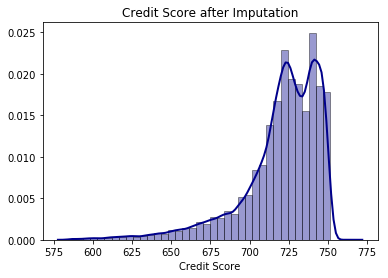

In [72]:
ax = sns.distplot(train_imputed['credit_score'], hist=True, kde=True, 
             bins=int(800/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Credit Score') 
plt.title('Credit Score after Imputation'); 
plt.show() 

### annual income

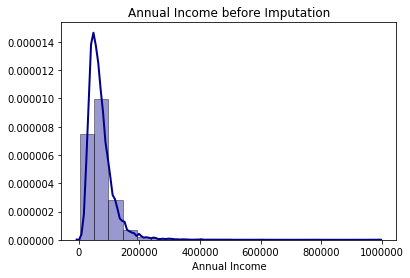

In [73]:
#before
ax = sns.distplot(train_numerical['annual_income'].dropna(), hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income before Imputation'); 
plt.show()

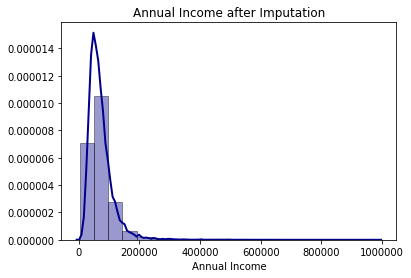

In [74]:
#it is same means it distributed data acc to other variables which we have used(if u have replaced with mean it would have steep rise )
ax = sns.distplot(train_imputed['annual_income'], hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income after Imputation'); 
plt.show()

### years in current job

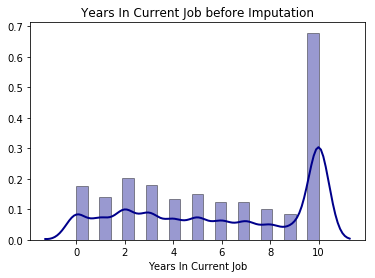

In [75]:
ax = sns.distplot(train_numerical['years_in_current_job'].dropna(), hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Years In Current Job') 
plt.title('Years In Current Job before Imputation'); 
plt.show()

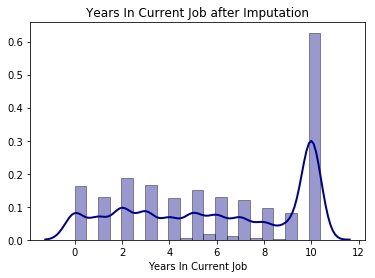

In [76]:
#after it looks same which is good
ax = sns.distplot(train_imputed['years_in_current_job'], hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Years In Current Job') 
plt.title('Years In Current Job after Imputation'); 
plt.show()

Replacing the features in Train dataframe by above Imputed dataframe.

In [77]:
train_imputed.shape

(62098, 13)

In [78]:
train.shape

(62098, 19)

In [79]:
train['years_in_current_job'] = train_imputed['years_in_current_job']
train['current_loan_amount'] = train_imputed['current_loan_amount']
train['credit_score'] = train_imputed['credit_score']
train['annual_income'] = train_imputed['annual_income']

In [80]:
print(train.shape)
train.isnull().sum()

(62098, 19)


loan_id                         0
customer_id                     0
loan_status                     0
current_loan_amount             0
term                            0
credit_score                    0
years_in_current_job            0
home_ownership                  0
annual_income                   0
purpose                         0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

#### Converting Months since last delinquent into categories

In [81]:
train['months_since_last_delinquent'] = ['extreme_risk' if x>51 
        else 'high_risk' if x>32 
        else 'moderate_risk' if x>16 
        else 'low_risk' if x>0 else 'no_risk' for x in train['months_since_last_delinquent']]

In [82]:
train['months_since_last_delinquent'].unique()

array(['moderate_risk', 'no_risk', 'low_risk', 'extreme_risk',
       'high_risk'], dtype=object)

#### Dropping of Loan ID and Customer ID as we have removed the duplicates and now it's not required further

In [83]:
train.drop(['loan_id', 'customer_id'], axis=1, inplace=True)

In [84]:
train.shape

(62098, 17)

### Handling Categorical Variables

We have 5 Categorical Variables in our data which are as below:

Term ,Home Ownership, Purpose, Months Since Last Delinquent, Loan Status.                                                               We will apply Label Encoding to Loan Status as this is a dependent variable, while for other we will apply One Hot Encoding.

In [85]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import LabelEncoder

In [86]:
#Applying Label Encoding to Loan Status
le = LabelEncoder()
train['loan_status'] = le.fit_transform(train.loan_status)
print(le.classes_)

['Charged Off' 'Fully Paid']


In [87]:
train.loan_status.unique()

array([0, 1])

In [88]:
train.term.unique()

array(['Long Term', 'Short Term'], dtype=object)

In [89]:
train.home_ownership.unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [90]:
train['home_ownership'] = ['Mortgage' if 'Mortgage' in x else x for x in train['home_ownership']]

In [91]:
train.home_ownership.unique()

array(['Rent', 'Mortgage', 'Own Home'], dtype=object)

In [92]:
train.purpose.unique()

array(['Debt Consolidation', 'Home Improvements', 'other', 'Other',
       'Buy a Car', 'Business Loan', 'Take a Trip', 'Buy House',
       'Medical Bills', 'moving', 'major_purchase',
       'Educational Expenses', 'wedding', 'small_business',
       'renewable_energy', 'vacation'], dtype=object)

So if you see here there can be n number of purpose to take loan its define and its actually not needed to train the model so dropping this feature.

In [93]:
train.drop(['purpose'], axis=1, inplace=True)

In [94]:
train.months_since_last_delinquent.unique()

array(['moderate_risk', 'no_risk', 'low_risk', 'extreme_risk',
       'high_risk'], dtype=object)

In [95]:
cols_to_transform = ['term', 'home_ownership','months_since_last_delinquent' ]
train_with_dummies = pd.get_dummies(train, prefix=cols_to_transform )

In [96]:
train_with_dummies.head()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,...,term_Long Term,term_Short Term,home_ownership_Mortgage,home_ownership_Own Home,home_ownership_Rent,months_since_last_delinquent_extreme_risk,months_since_last_delinquent_high_risk,months_since_last_delinquent_low_risk,months_since_last_delinquent_moderate_risk,months_since_last_delinquent_no_risk
0,0,10120.0,692.0,10.0,47564.0,990.92,21.8,10.0,0,3840,...,1,0,0,0,1,0,0,0,1,0
1,1,7144.0,721.0,2.0,40820.0,574.88,10.7,6.0,0,13269,...,0,1,1,0,0,0,0,0,0,1
2,1,10100.0,726.0,7.0,54540.0,577.22,37.3,6.0,0,5373,...,0,1,0,1,0,0,0,0,0,1
3,1,15350.0,707.0,5.0,44514.0,730.77,10.4,12.0,0,8485,...,1,0,1,0,0,0,0,0,1,0
4,1,12001.0,700.0,10.0,110211.0,1212.32,29.1,17.0,1,8845,...,0,1,1,0,0,0,0,1,0,0


In [97]:
train_with_dummies.shape

(62098, 23)

### EDA

In [98]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(train_with_dummies['loan_status'])
percentage_labels = (train_with_dummies['loan_status'].value_counts()/total_len)*100
percentage_labels

1    71.69313
0    28.30687
Name: loan_status, dtype: float64

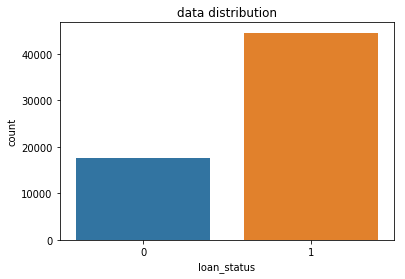

In [99]:
plt.figure(figsize=(6,4))
sns.countplot(train_with_dummies["loan_status"]).set_title("data distribution")
ax.set_xlabel("Labels for Loan Status attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [100]:
# Get the correlation of the training dataset
correlation = train_with_dummies.corr()
correlation

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,...,term_Long Term,term_Short Term,home_ownership_Mortgage,home_ownership_Own Home,home_ownership_Rent,months_since_last_delinquent_extreme_risk,months_since_last_delinquent_high_risk,months_since_last_delinquent_low_risk,months_since_last_delinquent_moderate_risk,months_since_last_delinquent_no_risk
loan_status,1.000000,-0.069601,0.185809,0.004115,0.060677,-0.016969,0.037337,-0.017964,-0.014588,0.008103,...,-0.174033,0.174033,0.059814,-0.001272,-0.059833,0.002816,0.000157,-0.016178,0.005750,0.004649
current_loan_amount,-0.069601,1.000000,-0.253671,0.122792,0.485222,0.452727,0.157291,0.213549,-0.074965,0.330118,...,0.405538,-0.405538,0.189545,-0.021593,-0.179374,-0.016467,-0.010991,0.029876,-0.002861,0.000339
credit_score,0.185809,-0.253671,1.000000,-0.019883,-0.010303,-0.095700,0.090618,-0.025743,-0.059426,-0.008871,...,-0.457050,0.457050,0.039373,-0.007677,-0.035401,-0.033962,-0.021543,-0.060203,-0.040582,0.099369
years_in_current_job,0.004115,0.122792,-0.019883,1.000000,0.094089,0.126290,0.234229,0.054091,0.042766,0.094985,...,0.064187,-0.064187,0.195753,0.010927,-0.204604,0.024411,0.022227,0.032433,0.019455,-0.062582
annual_income,0.060677,0.485222,-0.010303,0.094089,1.000000,0.615293,0.203360,0.186895,-0.019060,0.384140,...,0.109269,-0.109269,0.212819,-0.042009,-0.191051,-0.007197,0.015778,0.069819,0.027836,-0.067500
monthly_debt,-0.016969,0.452727,-0.095700,0.126290,0.615293,1.000000,0.193022,0.418184,-0.053597,0.471810,...,0.149232,-0.149232,0.200212,-0.033196,-0.183417,-0.002698,0.004766,0.055420,0.008397,-0.041766
years_of_credit_history,0.037337,0.157291,0.090618,0.234229,0.203360,0.193022,1.000000,0.127566,0.060076,0.203385,...,0.035108,-0.035108,0.180753,0.030356,-0.200732,0.035435,0.047562,0.076587,0.051550,-0.134189
number_of_open_accounts,-0.017964,0.213549,-0.025743,0.054091,0.186895,0.418184,0.127566,1.000000,-0.012976,0.221899,...,0.076450,-0.076450,0.137805,-0.009791,-0.133851,0.014262,0.013550,0.056901,0.017474,-0.064858
number_of_credit_problems,-0.014588,-0.074965,-0.059426,0.042766,-0.019060,-0.053597,0.060076,-0.012976,1.000000,-0.106148,...,-0.023287,0.023287,-0.005011,0.011474,-0.001609,0.081674,0.015311,-0.019376,-0.013530,-0.040519
current_credit_balance,0.008103,0.330118,-0.008871,0.094985,0.384140,0.471810,0.203385,0.221899,-0.106148,1.000000,...,0.091667,-0.091667,0.150863,0.005233,-0.155827,-0.041495,-0.030651,-0.017034,-0.032835,0.077616


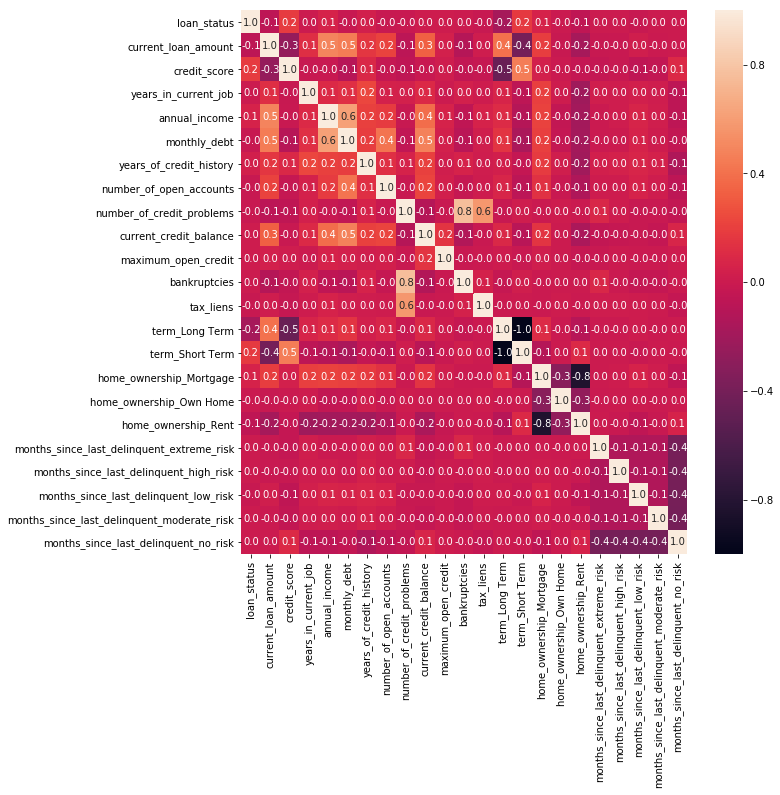

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,fmt=".1f")

#### Feature selection

In [146]:
X = train_with_dummies.drop('loan_status',axis=1)
y = train_with_dummies.loan_status

In [147]:
features_label = X.columns

**using random forest to check the important features**

In [148]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
print(importances)

[0.11340388 0.11614116 0.05521903 0.11463045 0.10841755 0.10258933
 0.06967287 0.01024533 0.10775529 0.10978377 0.00750292 0.00344152
 0.01048105 0.01029434 0.00590685 0.00474614 0.00604931 0.00773038
 0.0081486  0.00799928 0.00808232 0.01175864]


In [183]:
#Returns the indices that would sort an array
indices = np.argsort(importances)[::-1]
indices

array([11, 15, 14, 16, 10, 17, 19, 20, 18,  7, 13, 12, 21,  2,  6,  5,  8,
        4,  9,  0,  3,  1])

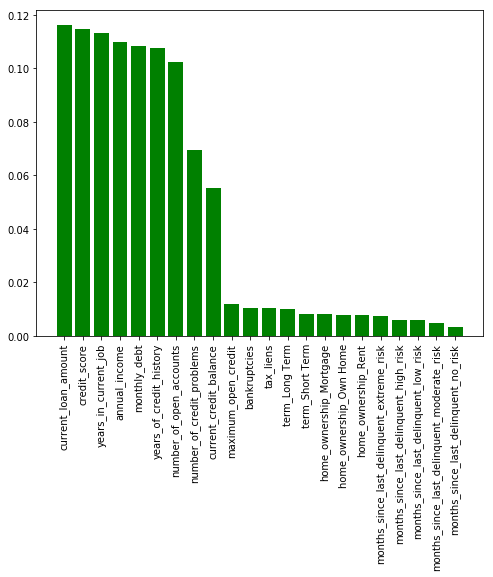

In [177]:
plt.figure(figsize=(8,6))
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90);

### Model building

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [203]:
X_filter = X[['current_loan_amount', 'credit_score', 'years_in_current_job', 'annual_income', 'monthly_debt', 'years_of_credit_history',
             'number_of_open_accounts', 'number_of_credit_problems', 'current_credit_balance']]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [205]:
#number of trees used is 10
Random = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

Random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [206]:
# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

In [207]:
cm

array([[ 982, 2507],
       [1665, 7266]])

In [208]:
#here percision value for 1 becomes important
print(classification_report(y_test, y_pred))
#68% accuracy

              precision    recall  f1-score   support

           0       0.37      0.28      0.32      3489
           1       0.74      0.81      0.78      8931

    accuracy                           0.66     12420
   macro avg       0.56      0.55      0.55     12420
weighted avg       0.64      0.66      0.65     12420



In [209]:
test_labels=Random.predict_proba(np.array(X_test.values))[:,1]   # 1 means i want probability of 1 class
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None) 

0.6025850106059772

#### lets make random forest better by hyperparameter tuning

In [199]:
from sklearn.model_selection import RandomizedSearchCV

In [200]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [201]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 59.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [202]:
#asit takes more than an hour to run its better to comment it once we got the value
#rf_random.best_params_
#{'n_estimators': 136,
# 'min_samples_split': 5,
# 'min_samples_leaf': 4,
# 'max_features': 'sqrt',
# 'max_depth': 80,
# 'bootstrap': True}

{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [210]:
Random_new = RandomForestClassifier(n_estimators=136, criterion='gini', max_depth=80, min_samples_split=5,
                               min_samples_leaf=4, min_weight_fraction_leaf=0.0, max_features='sqrt',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [221]:
Random_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=136, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [222]:
# Predicting the Test set results
y_pred = Random_new.predict(X_test)

# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

In [223]:
cm

array([[ 416, 3073],
       [ 337, 8594]])

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.12      0.20      3489
           1       0.74      0.96      0.83      8931

    accuracy                           0.73     12420
   macro avg       0.64      0.54      0.52     12420
weighted avg       0.68      0.73      0.66     12420



In [225]:
test_labels=Random_new.predict_proba(np.array(X_test.values))[:,1]   # 1 means i want probability of 1 class
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None) 

0.6773546715385133

### after hyperparameter tuning accuracy of random forest was 73% and auc- 67%
if u consider all features (if select set of features its accuracy reduces)

### logistic regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [226]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [227]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((46573, 22), (46573,), (15525, 22), (15525,))

In [228]:
y_train.value_counts()

1    33390
0    13183
Name: loan_status, dtype: int64

In [229]:
y_test.value_counts()

1    11130
0     4395
Name: loan_status, dtype: int64

In [230]:
log_reg = LogisticRegression()

In [231]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
log_reg.score(X_train,y_train)

0.7168745839864299

In [233]:
y_pred=log_reg.predict(X_test)

In [234]:
confusion_matrix(y_test,y_pred)

array([[   24,  4371],
       [   18, 11112]])

In [235]:
#performance measure
accuracy_score(y_test,y_pred)

0.7172946859903382

In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.01      0.01      4395
           1       0.72      1.00      0.84     11130

    accuracy                           0.72     15525
   macro avg       0.64      0.50      0.42     15525
weighted avg       0.68      0.72      0.60     15525



In [237]:
test_labels=log_reg.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.608156802377937

### logsitic gives 72% accuracy but auc is 60% 

## KNN

In [247]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [248]:
y_pred = KNN.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [249]:
cm

array([[ 835, 3560],
       [1603, 9527]])

In [250]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.19      0.24      4395
           1       0.73      0.86      0.79     11130

    accuracy                           0.67     15525
   macro avg       0.54      0.52      0.52     15525
weighted avg       0.62      0.67      0.63     15525



In [255]:
test_labels=KNN.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5537495643072307

### ADA boosting

In [251]:
# Fitting Ada-boost to the Training set
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)
ADA.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [252]:
# Predicting the Test set results
y_pred = ADA.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm

array([[  467,  3928],
       [  433, 10697]])

In [253]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.11      0.18      4395
           1       0.73      0.96      0.83     11130

    accuracy                           0.72     15525
   macro avg       0.63      0.53      0.50     15525
weighted avg       0.67      0.72      0.65     15525



In [254]:
test_labels=ADA.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.6761774335166054

### ADA boosting has 72% accuracy and auc- 67.6% 

### Gradient boosting

In [256]:
# Fitting GradientBoosting to the Training set
from sklearn.ensemble import GradientBoostingClassifier
GradientBoo = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
GradientBoo.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [257]:
# Predicting the Test set results
y_pred = GradientBoo.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm

array([[  484,  3911],
       [  424, 10706]])

In [258]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.11      0.18      4395
           1       0.73      0.96      0.83     11130

    accuracy                           0.72     15525
   macro avg       0.63      0.54      0.51     15525
weighted avg       0.68      0.72      0.65     15525



In [259]:
test_labels=GradientBoo.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.6857698499581428

### Gradient boosting has accuracy of 72% and auc - 68%

### Random forest is best model

**applying random forst on new unseen data**

In [260]:
new_test_data = pd.read_csv("test_with_dummies.csv")

In [268]:
x_test = new_test_data.drop("loan_status",axis=1)
y_test_new = new_test_data.loan_status

In [267]:
y_test_pred=Random_new.predict(x_test)

In [269]:
cm = confusion_matrix(y_test_new, y_test_pred)
np.set_printoptions(precision=2)
cm

array([[  945,  6582],
       [  749, 18319]])

In [271]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.13      0.20      7527
           1       0.74      0.96      0.83     19068

    accuracy                           0.72     26595
   macro avg       0.65      0.54      0.52     26595
weighted avg       0.69      0.72      0.66     26595



In [272]:
test_labels=GradientBoo.predict_proba(np.array(x_test.values))[:,1]
roc_auc_score(y_test_new,test_labels , average='macro', sample_weight=None)

0.6873514211853898

### when applied random forest on unseen data it gave 72% accuracy 